<a href="https://colab.research.google.com/github/Aquamarine278/Final-project/blob/main/CNN_Model_Classification_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
# # run only if version is not above 2.18.0
# !pip uninstall -y tensorflow
# !pip install tensorflow==2.18.0

In [ ]:
import os
import csv
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read in the dataframe of images paths and labels
df = pd.read_csv('/content/drive/MyDrive/Final-project/merged_image_data.csv')
df.head()

,image_path,label
0,./Normal/images/Normal-6196.png,Normal-6196.png
1,./Normal/images/Normal-7288.png,Normal-7288.png
2,./Normal/images/Normal-1821.png,Normal-1821.png
3,./Normal/images/Normal-4781.png,Normal-4781.png
4,./Normal/images/Normal-4959.png,Normal-4959.png


In [ ]:
# inspect the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  21165 non-null  object
 1   label       21165 non-null  object
dtypes: object(2)
memory usage: 330.8+ KB
None


In [ ]:
df.head()

,image_path,label
0,./Normal/images/Normal-6196.png,Normal-6196.png
1,./Normal/images/Normal-7288.png,Normal-7288.png
2,./Normal/images/Normal-1821.png,Normal-1821.png
3,./Normal/images/Normal-4781.png,Normal-4781.png
4,./Normal/images/Normal-4959.png,Normal-4959.png


In [ ]:
# First, remove the .png file extension, then split into four new columns.
df[['Classification Type', 'Picture No.']] = df['label']\
                                                            .str.replace('.png', '', regex=False)\
                                                            .str.split('-', expand=True)
df.tail()

,image_path,label,Classification Type,Picture No.
21160,./Viral_Pneumonia/images/Viral Pneumonia-972.png,Viral Pneumonia-972.png,Viral Pneumonia,972
21161,./Viral_Pneumonia/images/Viral Pneumonia-741.png,Viral Pneumonia-741.png,Viral Pneumonia,741
21162,./Viral_Pneumonia/images/Viral Pneumonia-999.png,Viral Pneumonia-999.png,Viral Pneumonia,999
21163,./Viral_Pneumonia/images/Viral Pneumonia-755.png,Viral Pneumonia-755.png,Viral Pneumonia,755
21164,./Viral_Pneumonia/images/Viral Pneumonia-769.png,Viral Pneumonia-769.png,Viral Pneumonia,769


In [ ]:
# value counts for Classification Type
df['Classification Type'].value_counts()

,count
Classification Type,
Normal,10192
Lung_Opacity,6012
COVID,3616
Viral Pneumonia,1345


In [ ]:
# add a column called Classification and if the Classification Type is Normal, then the Classification it is Normal, if it is not Normal, then it is Abnormal
df['Classification'] = df['Classification Type'].apply(lambda x: 'Normal' if x == 'Normal' else 'Abnormal')
df.head()

,image_path,label,Classification Type,Picture No.,Classification
0,./Normal/images/Normal-6196.png,Normal-6196.png,Normal,6196,Normal
1,./Normal/images/Normal-7288.png,Normal-7288.png,Normal,7288,Normal
2,./Normal/images/Normal-1821.png,Normal-1821.png,Normal,1821,Normal
3,./Normal/images/Normal-4781.png,Normal-4781.png,Normal,4781,Normal
4,./Normal/images/Normal-4959.png,Normal-4959.png,Normal,4959,Normal


In [ ]:
df.tail()

,image_path,label,Classification Type,Picture No.,Classification
21160,./Viral_Pneumonia/images/Viral Pneumonia-972.png,Viral Pneumonia-972.png,Viral Pneumonia,972,Abnormal
21161,./Viral_Pneumonia/images/Viral Pneumonia-741.png,Viral Pneumonia-741.png,Viral Pneumonia,741,Abnormal
21162,./Viral_Pneumonia/images/Viral Pneumonia-999.png,Viral Pneumonia-999.png,Viral Pneumonia,999,Abnormal
21163,./Viral_Pneumonia/images/Viral Pneumonia-755.png,Viral Pneumonia-755.png,Viral Pneumonia,755,Abnormal
21164,./Viral_Pneumonia/images/Viral Pneumonia-769.png,Viral Pneumonia-769.png,Viral Pneumonia,769,Abnormal


In [ ]:
# Start with the userid column
# Look at the value counts to decide which encoder to use
df['Classification'].value_counts()

,count
Classification,
Abnormal,10973
Normal,10192


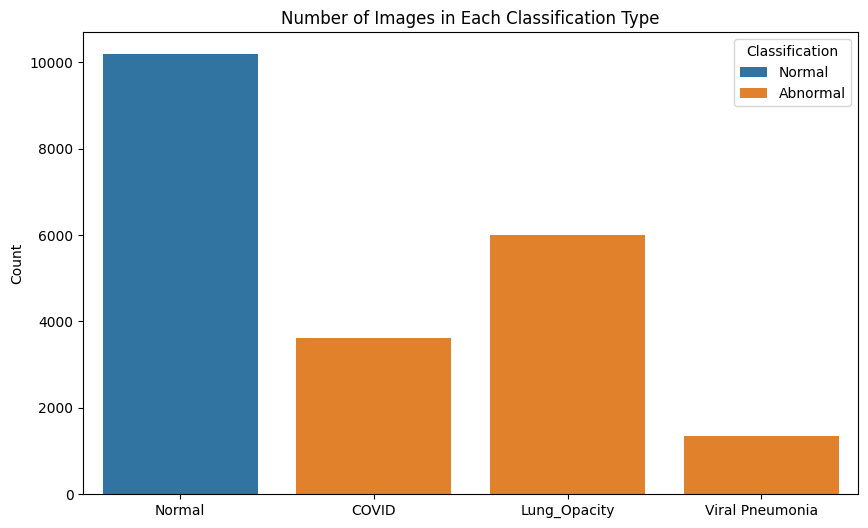

In [ ]:
# create a graph showing the number of images in each classification type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Classification Type', hue='Classification')
plt.title('Number of Images in Each Classification Type')
# label the y axis as Number
plt.ylabel('Count')
# remove the x axis label
plt.xlabel('')
plt.show()

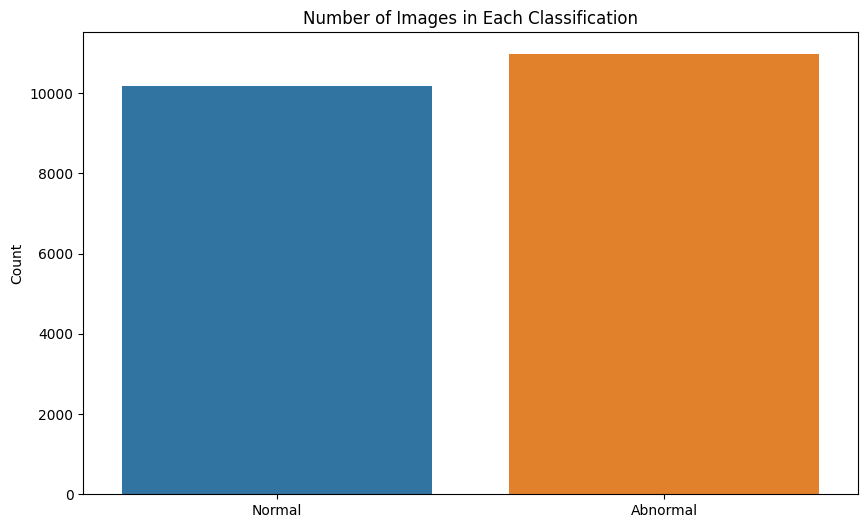

In [ ]:
# create a graph showing the number of images in each classification
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Classification', hue='Classification')
plt.title('Number of Images in Each Classification')
# label the y axis as Number
plt.ylabel('Count')
# remove the x axis label
plt.xlabel('')
plt.show()

In [ ]:
# Load the images from the img_preprocessed32.pkl file
import pickle

with open('/content/drive/MyDrive/Final-project/img_preprocessed.pkl', 'rb') as file:
    normalized_images = pickle.load(file)

normalized_images[0]

array([[0.9411765 , 0.91764706, 0.8901961 , ..., 0.827451  , 0.84705883,
        0.827451  ],
       [0.8666667 , 0.8509804 , 0.827451  , ..., 0.7411765 , 0.76862746,
        0.7529412 ],
       [0.7058824 , 0.5176471 , 0.41568628, ..., 0.6431373 , 0.6784314 ,
        0.6784314 ],
       ...,
       [0.80784315, 0.78431374, 0.79607844, ..., 0.75686276, 0.75686276,
        0.68235296],
       [0.8392157 , 0.80784315, 0.8117647 , ..., 0.7647059 , 0.77254903,
        0.7529412 ],
       [0.85882354, 0.8235294 , 0.8235294 , ..., 0.77254903, 0.78039217,
        0.77254903]], dtype=float32)

In [ ]:
# save normalized images as X
X = normalized_images

In [ ]:
# creat the y
y = df['Classification']
y.head()

,Classification
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal


In [ ]:
# Check the total number of classes
y.nunique()

2

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [ ]:
# Normalize and reshape the images to have 1 channel
import numpy as np
from sklearn.preprocessing import OneHotEncoder

y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train).reshape(-1, 1))
y_train_enc = y_encoder.transform(np.array(y_train).reshape(-1, 1))
y_test_enc = y_encoder.transform(np.array(y_test).reshape(-1, 1))


X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train_enc)
y_test_np = np.array(y_test_enc)
print("Shape of y_train_enc:", y_train_np.shape)
print("Shape of y_test_enc:", y_test_np.shape)

Shape of y_train_enc: (15873, 2)
Shape of y_test_enc: (5292, 2)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define a CNN model
from tensorflow.keras import layers, models

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1), name = 'conv1'),
    layers.MaxPooling2D((2, 2), name = 'pool1'),
    layers.Conv2D(64, (3, 3), activation='relu', name = 'conv2'),
    layers.MaxPooling2D((2, 2), name = 'pool2'),
    layers.Conv2D(64, (3, 3), activation='relu', name = 'conv3'),
    layers.Flatten(name = 'flatten'),
    layers.Dense(64, activation='relu', name = 'dense1'),
    layers.Dense(2, activation='sigmoid', name = 'output')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','Precision' , 'Recall', 'AUC'])

# Train the model

epochs = 10
history = model.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - AUC: 0.7981 - Precision: 0.7205 - Recall: 0.7387 - accuracy: 0.7255 - loss: 0.5369 - val_AUC: 0.8676 - val_Precision: 0.7873 - val_Recall: 0.8031 - val_accuracy: 0.7920 - val_loss: 0.4692
Epoch 2/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 0.9011 - Precision: 0.8216 - Recall: 0.8237 - accuracy: 0.8224 - loss: 0.3998 - val_AUC: 0.9083 - val_Precision: 0.8266 - val_Recall: 0.8330 - val_accuracy: 0.8297 - val_loss: 0.3859
Epoch 3/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 0.9317 - Precision: 0.8540 - Recall: 0.8557 - accuracy: 0.8543 - loss: 0.3347 - val_AUC: 0.9343 - val_Precision: 0.8670 - val_Recall: 0.8662 - val_accuracy: 0.8662 - val_loss: 0.3350
Epoch 4/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - AUC: 0.9477 - Precision: 0.8790 - Recall: 0.8813 - accuracy: 0.8800 - loss: 0.2929 - val_AUC: 0.9408 - val_Precision: 0.8722 - val_Recall: 0.8757 - val_accuracy: 0.8743 - val_loss: 0.3147
Epoch 5/10
497/497 ━━━━━━━━

In [ ]:
model.evaluate(X_test_np, y_test_np, verbose =2)

166/166 - 1s - 5ms/step - AUC: 0.9445 - Precision: 0.8853 - Recall: 0.8851 - accuracy: 0.8849 - loss: 0.3898


[0.3898220956325531,
 0.8849206566810608,
 0.8852769136428833,
 0.8851096034049988,
 0.9444969296455383]

In [ ]:
# evaluate model loss and metrics using the evaluate method and the test data
model_loss, model_accuracy, model_precision, model_recall, model_auc = model.evaluate(X_test_np, y_test_np, verbose =2)
# display the model loss and metric results
print(f' Loss: {model_loss}, Accuracy: {model_accuracy}, Precision: {model_precision}, Recall: {model_recall}, AUC: {model_auc}')

166/166 - 1s - 5ms/step - AUC: 0.9445 - Precision: 0.8853 - Recall: 0.8851 - accuracy: 0.8849 - loss: 0.3898
 Loss: 0.3898220956325531, Accuracy: 0.8849206566810608, Precision: 0.8852769136428833, Recall: 0.8851096034049988, AUC: 0.9444969296455383


In [ ]:
# Export the model to a keras file
# model.save('/content/drive/MyDrive/Final-project/x-ray_classifier_128_extra_metrics.keras')

In [ ]:
# Load the model to a new object
model = tf.keras.models.load_model('/content/drive/MyDrive/Final-project/x-ray_classifier_128_extra_metrics.keras')

In [ ]:
model.evaluate(X_test_np, y_test_np, verbose =2)

166/166 - 5s - 27ms/step - AUC: 0.9445 - Precision: 0.8853 - Recall: 0.8851 - accuracy: 0.8849 - loss: 0.3898


[0.3898220956325531,
 0.8849206566810608,
 0.8852769136428833,
 0.8851096034049988,
 0.9444969296455383]

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,801,608 (37.39 MB)

 Trainable params: 3,267,202 (12.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,534,406 (24.93 MB)

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras import layers, metrics
import tensorflow as tf

# Define the model architecture
inputs = Input(shape=(128, 128, 1), name='input_layer')
x = layers.Conv2D(32, (3, 3), activation='relu', name='conv1')(inputs)
x = layers.MaxPooling2D((2, 2), name='pool1')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name='conv2')(x)
x = layers.MaxPooling2D((2, 2), name='pool2')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name='conv3')(x)
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(64, activation='relu', name='dense1')(x)
outputs = layers.Dense(2, activation='sigmoid', name='output')(x)

modelcam = Model(inputs=inputs, outputs=outputs)

# Compile
modelcam.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Train
history = modelcam.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=10
)


Epoch 1/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7261 - auc_5: 0.7979 - loss: 0.5341 - precision_5: 0.7301 - recall_5: 0.7155 - val_accuracy: 0.8205 - val_auc_5: 0.8922 - val_loss: 0.4262 - val_precision_5: 0.8178 - val_recall_5: 0.8226
Epoch 2/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8279 - auc_5: 0.9039 - loss: 0.3938 - precision_5: 0.8301 - recall_5: 0.8257 - val_accuracy: 0.8269 - val_auc_5: 0.9083 - val_loss: 0.3833 - val_precision_5: 0.8303 - val_recall_5: 0.8190
Epoch 3/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8537 - auc_5: 0.9281 - loss: 0.3424 - precision_5: 0.8535 - recall_5: 0.8533 - val_accuracy: 0.7959 - val_auc_5: 0.8856 - val_loss: 0.4366 - val_precision_5: 0.7920 - val_recall_5: 0.8029
Epoch 4/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8749 - auc_5: 0.9450 - loss: 0.2998 - precision_5: 0.8741 - recall_5: 0.8746 - val_accuracy: 0.8556 - val_auc_5: 0.9305 - val_loss: 0.3366 - val_precision_5: 0.8560 -

In [ ]:
modelcam.evaluate(X_test_np, y_test_np, verbose =2)

166/166 - 1s - 5ms/step - accuracy: 0.8832 - auc_5: 0.9447 - loss: 0.3689 - precision_5: 0.8843 - recall_5: 0.8806


[0.3689045310020447,
 0.8832199573516846,
 0.8842504620552063,
 0.8805744647979736,
 0.9447001814842224]

In [ ]:
# Export the model to a keras file
# modelcam.save('/content/drive/MyDrive/Final-project/x-ray_classifier_128_modelcam.keras')

In [ ]:
# Load the model to a new object
modelcam = tf.keras.models.load_model('/content/drive/MyDrive/Final-project/x-ray_classifier_128_modelcam.keras')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import cv2

def safe_grad_cam(model, img, layer_name='conv3'):
    if img.ndim == 2:
        img = np.expand_dims(img, axis=-1)
    elif img.shape[-1] != 1:
        img = img[..., :1]

    img_input = np.expand_dims(img, axis=0)

    try:
        grad_model = Model(
            inputs=model.input,
            outputs=[model.get_layer(layer_name).output, model.output]
        )

        with tf.GradientTape() as tape:
            conv_outputs, predictions = grad_model(img_input)
            class_idx = tf.argmax(predictions[0])
            loss = predictions[:, class_idx]

        grads = tape.gradient(loss, conv_outputs)

        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        heatmap = tf.reduce_sum(conv_outputs[0] * pooled_grads, axis=-1)
        heatmap = np.maximum(heatmap, 0)

        if np.max(heatmap) != 0:
            heatmap /= np.max(heatmap)

        return heatmap, predictions[0] if hasattr(predictions, 'numpy') else predictions[0]

    except Exception as e:
        print("Grad-CAM failed:", e)
        return None, None


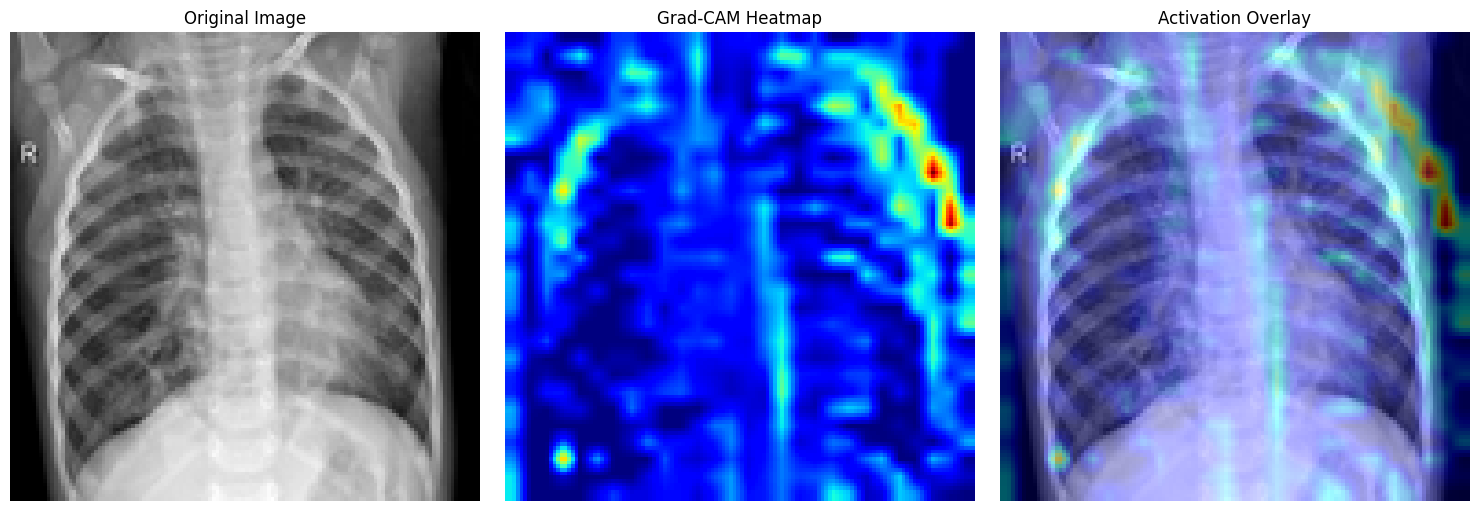

Class probabilities: Abnormal: 0.8136, Normal: 0.2108
Predicted class: Abnormal


In [ ]:
# Use one image from test set
img = X_test_np[0]

# Run Grad-CAM
heatmap, predictions = safe_grad_cam(modelcam, img)

if heatmap is not None:
    heatmap_resized = cv2.resize(heatmap, (128, 128))

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(img.squeeze(), cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(heatmap_resized, cmap='jet')
    axes[1].set_title('Grad-CAM Heatmap')
    axes[1].axis('off')

    # Ensure img is in the correct format (uint8 and 3 channels) for cv2.addWeighted
    img_display = np.uint8(255 * img.squeeze()) # Convert to uint8
    img_display = cv2.cvtColor(img_display, cv2.COLOR_GRAY2RGB) # Convert to 3 channels

    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    heatmap_rgb = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

    # Ensure heatmap_rgb is the same size as img_display
    heatmap_rgb = cv2.resize(heatmap_rgb, (img_display.shape[1], img_display.shape[0]))


    overlayed = cv2.addWeighted(img_display, 0.9, heatmap_rgb, 0.4, 0)

    axes[2].imshow(overlayed)
    axes[2].set_title('Activation Overlay')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Class probabilities: Abnormal: {predictions[0]:.4f}, Normal: {predictions[1]:.4f}")
    print(f"Predicted class: {'Abnormal' if np.argmax(predictions) == 0 else 'Normal'}")
else:
    print("Grad-CAM failed")

In [ ]:
# # Evaluate the model loss and accuracy metrics using the evaluate method and the test data
# model_loss, model_accuracy = model.evaluate(X_test_np, y_test_np, verbose =2)

# # Display the model loss and accuracy results
# print(f' Loss: {model_loss}, Accuracy: {model_accuracy}')

166/166 - 54s - 326ms/step - accuracy: 0.9609 - loss: 0.1435
 Loss: 0.14354285597801208, Accuracy: 0.9608843326568604


In [ ]:
# Export the model to a keras file
# model.save('/content/drive/MyDrive/Final-project/x-ray_classifier_128.keras')

In [ ]:
# Load the model to a new object
# model = tf.keras.models.load_model('/content/drive/MyDrive/Final-project/x-ray_classifier_128.keras')

In [ ]:
# model.evaluate(X_test_np, y_test_np, verbose =2)

166/166 - 42s - 256ms/step - accuracy: 0.9609 - loss: 0.1435


[0.14354285597801208, 0.9608843326568604]

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
pip install --upgrade tensorflow keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()

    # Tune the number of filters in the first Conv2D layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=64, step=32),
        kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(128, 128, 1)
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Tune the number of filters in the second Conv2D layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=128, step=32),
        kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Tune the number of filters in the third Conv2D layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv3_filters', min_value=64, max_value=128, step=32),
        kernel_size=hp.Choice('conv3_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(layers.Flatten())

    # Tune the number of units in the Dense layer
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=32, max_value=64, step=32),
        activation='relu'
    ))

    # Output layer
    model.add(layers.Dense(2, activation='sigmoid'))

    # Tune the learning rate
    learning_rate = hp.Choice('learning_rate', values=[0.0005, 0.001, 0.0015])

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', 'Precision' , 'Recall', 'AUC']
    )

    return model

In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=15,  # Maximum number of epochs for each configuration
    factor=3,       # Reduction factor for the number of configurations and epochs
    directory='/content/drive/MyDrive/Final-project/',  # Directory to save tuning results
    project_name='cnn_hyperband_128_trial3'   # Project name
)

Reloading Tuner from /content/drive/MyDrive/Final-project/cnn_hyperband_128_trial3/tuner0.json


In [ ]:
y_training_tuning = y_train.iloc[1:101]
print(y_training_tuning.value_counts())
y_test_tuning = y_test.iloc[4:14]
print(y_test_tuning.value_counts())

Classification
Abnormal    50
Normal      50
Name: count, dtype: int64
Classification
Abnormal    5
Normal      5
Name: count, dtype: int64


In [ ]:
# we don't have enough resource to do hyperparameters tuning with out entire training set
# let's reduce to training to 100 and testing to 10
y_train_tuning = y_train_np[1:101]
X_train_tuning = X_train_np[1:101]

y_test_tuning = y_test_np[4:14]
X_test_tuning = X_test_np[4:14]


In [ ]:
tuner.search(
    X_train_tuning, y_train_tuning,
    validation_data=(X_test_tuning, y_test_tuning),
    epochs=20,  # Number of epochs for each trial
    verbose=2   # Print progress
)

In [ ]:
# Get the best model
tuned_model = tuner.get_best_models(num_models=1)[0]

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hyperparameters.values)

# Train the best model with more epochs
history = tuned_model.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=15,  # Train for more epochs
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters:
{'conv1_filters': 32, 'conv1_kernel': 3, 'conv2_filters': 128, 'conv2_kernel': 5, 'conv3_filters': 128, 'conv3_kernel': 3, 'dense_units': 32, 'learning_rate': 0.001, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}
Epoch 1/15
497/497 - 31s - 62ms/step - AUC: 0.8641 - Precision: 0.7823 - Recall: 0.7838 - accuracy: 0.7835 - loss: 0.4617 - val_AUC: 0.8841 - val_Precision: 0.8109 - val_Recall: 0.7732 - val_accuracy: 0.7991 - val_loss: 0.4440
Epoch 2/15
497/497 - 31s - 61ms/step - AUC: 0.9133 - Precision: 0.8338 - Recall: 0.8349 - accuracy: 0.8347 - loss: 0.3746 - val_AUC: 0.9240 - val_Precision: 0.8405 - val_Recall: 0.8604 - val_accuracy: 0.8471 - val_loss: 0.3534
Epoch 3/15
497/497 - 14s - 29ms/step - AUC: 0.9357 - Precision: 0.8625 - Recall: 0.8620 - accuracy: 0.8632 - loss: 0.3244 - val_AUC: 0.9317 - val_Precision: 0.8614 - val_Recall: 0.8609 - val_accuracy: 0.8604 - val_loss: 0.3480
Epoch 4/15
497/497 - 

In [ ]:
# Export the model to a keras file
tuned_model.save('/content/drive/MyDrive/Final-project/x-ray_classifier_tuned.keras')

In [ ]:
tuned_model.evaluate(X_test_np, y_test_np, verbose =2)

166/166 - 2s - 10ms/step - AUC: 0.9309 - Precision: 0.8756 - Recall: 0.8755 - accuracy: 0.8768 - loss: 0.5554


[0.5553755164146423,
 0.8767951726913452,
 0.8756378889083862,
 0.8754724264144897,
 0.9309473037719727]